# Trực quan hóa mạng lưới thần kinh bằng Python

Bạn chắc chắn đã sử dụng mạng nơ-ron để đào tạo mô hình trên dữ liệu của mình. Có rất nhiều loại kiến trúc của mạng nơ-ron mà bạn có thể sử dụng để huấn luyện một mô hình, nhưng bạn đã bao giờ hình dung ra kiến trúc của mạng nơ-ron chưa? Nếu bạn muốn tìm hiểu cách hình dung mạng lưới thần kinh, bài viết này là dành cho bạn. Trong bài viết này, tôi sẽ hướng dẫn bạn cách trực quan hóa mạng lưới thần kinh bằng Python.

## Làm thế nào để hình dung một mạng lưới thần kinh?
Có nhiều công cụ bạn có thể sử dụng để hình dung kiến trúc của mạng nơ-ron. Một số công cụ tốt nhất để trực quan hóa mạng lưới thần kinh là:

1. Net2Vis
2. VisualKeras
3. drawconvent
4. NNSVG
5. PlotNeuralNet
6. Tensorboard
7. Graphviz
8. TensorSpace

Theo tôi, trong số tất cả các công cụ được đề cập ở trên, sử dụng VisualKeras là cách tiếp cận dễ dàng nhất để hình dung mạng lưới thần kinh. Vì vậy, trong phần bên dưới, tôi sẽ giới thiệu cho bạn hướng dẫn về cách trực quan hóa mạng lưới thần kinh bằng Visualkeras bằng ngôn ngữ lập trình Python.

## Trực quan hóa mạng lưới thần kinh bằng Python
Trước khi hình dung kiến trúc của mạng nơ-ron, trước tiên chúng ta phải thiết kế mạng nơ-ron. Nếu bạn đã từng giải quyết một vấn đề bằng cách sử dụng mạng thần kinh, bạn có thể bỏ qua phần này và tìm hiểu cách hình dung kiến trúc của mạng thần kinh như được trình bày trong phần tiếp theo bên dưới. Nếu bạn chưa bao giờ thiết kế mạng nơ-ron thì đây là cách chúng ta có thể thiết kế kiến trúc của mạng nơ-ron tích chập:

In [3]:
import tensorflow as tf
import keras
from keras.models import Sequential, Model
"""
Import hai lớp Sequential và Model từ mô-đun tensorflow.keras.models. Lớp Sequential được sử dụng để tạo một
 chuỗi tuyến tính của các lớp, trong khi lớp Model là lựa chọn linh hoạt hơn để định nghĩa mô hình phức tạp.
"""
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
"""
Import các lớp lớp khác nhau từ mô-đun tensorflow.keras.layers. Các lớp này bao gồm Input
(để định nghĩa lớp đầu vào), Dense (lớp liên kết đầy đủ), Dropout (lớp dropout), Flatten (làm phẳng đầu ra),
Conv2D (lớp tích chập 2D), và MaxPooling2D (lớp max pooling).
"""
from keras.layers import LeakyReLU
# Import hàm kích hoạt Leaky ReLU, được sử dụng làm hàm kích hoạt trong một số lớp tích chập.
model = Sequential()
# Tạo một mô hình Sequential, một chuỗi tuyến tính của các lớp.
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(28, 28, 1), padding='same'))
"""
Thêm một lớp tích chập 2D với 32 bộ lọc, kích thước kernel là (3, 3), hàm kích hoạt linear,
hình dạng đầu vào là (28, 28, 1), và padding được thiết lập là 'same'.
"""
model.add(LeakyReLU(alpha=0.1))
# Thêm một lớp kích hoạt Leaky ReLU với tham số slope âm (alpha) là 0.1.
model.add(MaxPooling2D((2, 2), padding='same'))
# Thêm một lớp max pooling 2D với kích thước pool là (2, 2) và padding là 'same'.
# Lặp lại mô hình tương tự với các lớp tích chập, kích hoạt Leaky ReLU và max pooling.
model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Flatten())
# Làm phẳng đầu ra của lớp trước thành mảng một chiều.
model.add(Dense(128, activation='linear'))
# Thêm một lớp fully connected với 128 nơ-ron và hàm kích hoạt linear.
model.add(LeakyReLU(alpha=0.1))
# Thêm một lớp kích hoạt Leaky ReLU khác.
model.add(Dense(500, activation='softmax'))
# Thêm một lớp fully connected với 500 nơ-ron và hàm kích hoạt softmax, phù hợp cho bài toán phân loại đa lớp.
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
# Biên dịch mô hình, chỉ định hàm mất mát là categorical crossentropy, tối ưu hóa bằng Adam và sử dụng độ chính xác làm độ đo đánh giá. Điều này chuẩn bị mô hình để huấn luyện.

In [ ]:
import visualkeras  
visualkeras.layered_view(model)

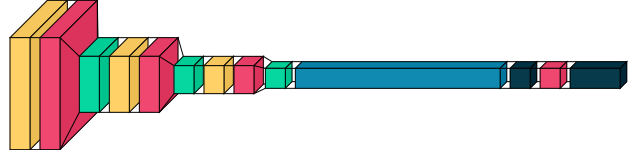